# Analysis Tasks to be performed:

1. Build a model of housing prices to predict median house values in California using the provided dataset.

2. Train the model to learn from the data to predict the median housing price in any district, given all the other metrics.

3. Predict housing prices based on median_income and plot the regression chart for it.

1. Load the data :

Read the “housing.csv” file from the folder into the program.
Print first few rows of this data.
Extract input (X) and output (Y) data from the dataset.
2. Handle missing values :

Fill the missing values with the mean of the respective column.
3. Encode categorical data :

Convert categorical column in the dataset to numerical data.
4. Split the dataset : 

Split the data into 80% training dataset and 20% test dataset.
5. Standardize data :

Standardize training and test datasets.
6. Perform Linear Regression : 

Perform Linear Regression on training data.
Predict output for test dataset using the fitted model.
Print root mean squared error (RMSE) from Linear Regression.
            [ HINT: Import mean_squared_error from sklearn.metrics ]

7. Bonus exercise: Perform Linear Regression with one independent variable :

Extract just the median_income column from the independent variables (from X_train and X_test).
Perform Linear Regression to predict housing values based on median_income.
Predict output for test dataset using the fitted model.
Plot the fitted model for training data as well as for test data to check if the fitted model satisfies the test data."""

In [1]:
#Import Necessary Libraries:
import pandas as pd
import numpy as np

from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.linear_model import LinearRegression,Ridge,Lasso,ElasticNet
from sklearn.tree import DecisionTreeRegressor
import statsmodels.formula.api as smf
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.preprocessing import PolynomialFeatures
from math import sqrt
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from matplotlib.axes._axes import _log as matplotlib_axes_logger
matplotlib_axes_logger.setLevel('ERROR')

# load data and prepare data for analysis

In [2]:
df_housing =pd.read_excel("1553768847_housing.xlsx")

In [3]:
#view the first 5 data
df_housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
0,-122.23,37.88,41,880,129.0,322,126,8.3252,NEAR BAY,452600
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,NEAR BAY,358500
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,NEAR BAY,352100
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,NEAR BAY,341300
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,NEAR BAY,342200


In [4]:
# confirm the columns are all captured
df_housing.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'ocean_proximity', 'median_house_value'],
      dtype='object')

In [5]:
# check for any missing values/data
df_housing.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
ocean_proximity         0
median_house_value      0
dtype: int64

In [6]:
# 207 data/values are missing in column "total_bedrooms"
# replace the missing data/values with the mean of the column
df_housing.total_bedrooms = df_housing.total_bedrooms.fillna(df_housing.total_bedrooms.mean())

In [7]:
# confirm the missing values/data are now replaced
df_housing.isnull().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
ocean_proximity       0
median_house_value    0
dtype: int64

# Encode categorical data

In [8]:
# Encode categorical data - that is convert text to numerical data... here column "ocean_proximity" is in text format
# or Convert categorical column in the dataset to numerical data
enco = LabelEncoder()
df_housing['ocean_proximity'] = enco.fit_transform(df_housing['ocean_proximity'])

In [9]:
#confirm all data are numerial now
df_housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
0,-122.23,37.88,41,880,129.0,322,126,8.3252,3,452600
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,3,358500
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,3,352100
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,3,341300
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,3,342200


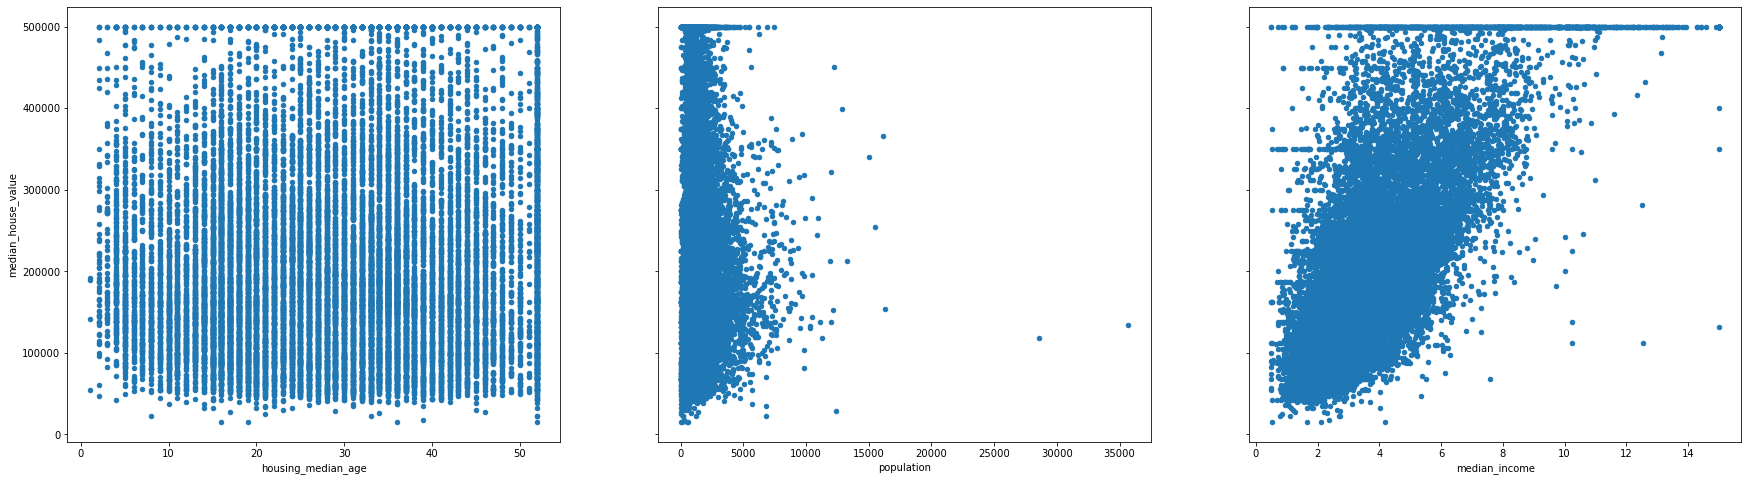

In [10]:
# Find relationship between each of the feature/independent variables
#and dependent variables

fig,axs = plt.subplots(1,3,sharey=True)
df_housing.plot(kind="scatter", x= "housing_median_age", y="median_house_value", ax=axs[0],figsize=(30,8))
df_housing.plot(kind="scatter", x= "population", y="median_house_value", ax=axs[1])
df_housing.plot(kind="scatter", x= "median_income", y="median_house_value", ax=axs[2])

# Standardize data and assign as either dependent or independent

In [11]:
# Create the Scaler object

scaler = StandardScaler()
# Fit the data on the scaler object
sc_df = scaler.fit_transform(df_housing)
sc_df = pd.DataFrame(sc_df, columns= df_housing.columns)
sc_df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
0,-1.327835,1.052548,0.982143,-0.804819,-0.975228,-0.974429,-0.977033,2.344766,1.291089,2.129631
1,-1.322844,1.043185,-0.607019,2.045890,1.355088,0.861439,1.669961,2.332238,1.291089,1.314156
2,-1.332827,1.038503,1.856182,-0.535746,-0.829732,-0.820777,-0.843637,1.782699,1.291089,1.258693
3,-1.337818,1.038503,1.856182,-0.624215,-0.722399,-0.766028,-0.733781,0.932968,1.291089,1.165100
4,-1.337818,1.038503,1.856182,-0.462404,-0.615066,-0.759847,-0.629157,-0.012881,1.291089,1.172900


In [12]:
# Extract input/independent data (X) and output/dependent data (Y) from the dataset(df_housing)
X_Features = ['longitude', 'latitude', 'housing_median_age', 'total_rooms', 'total_bedrooms', 
            'population', 'households', 'median_income', 'ocean_proximity']
Y_label = ['median_house_value']
X=sc_df[X_Features]
Y=sc_df[Y_label]

print(type(X))
print(type(Y))

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>


In [13]:
# confirm the shape of X/independent varaibles and Y/dependent variables

print(df_housing.shape)
print(sc_df.shape)
print(X.shape)
print(Y.shape)

(20640, 10)
(20640, 10)
(20640, 9)
(20640, 1)


# Split the data into training dataset and test dataset

In [14]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=1)

In [15]:
# confirm the shape of the train and test data

print (x_train.shape, y_train.shape)
print (x_test.shape, y_test.shape)

(16512, 9) (16512, 1)
(4128, 9) (4128, 1)


# Apply Various models and pick the best - MSE and r2 Score

In [16]:
# Apply Various models: Linear Regression, Decision Tree Regression, Random Forest Regression, Lasso,Ridge, Elastic Net, 
# Polynomial Regression

#High score_r2 is good - 1, mean two variables are perfectly correlated
#High value of MSE means oberved values and predicted values has high error.

In [43]:
#Linear Regression
linreg=LinearRegression()
linreg.fit(x_train,y_train)

y_predict = linreg.predict(x_test)

print(f" r2 score is: {(r2_score(y_test,y_predict))}")
print(f" mse is:{sqrt(mean_squared_error(y_test,y_predict))}")

print(linreg.intercept_)
print(linreg.coef_)

 r2 score is: 0.6276223517950297
 mse is:0.605659812030122
[0.00309942]
[[-0.741358   -0.78605901  0.12673027 -0.13863561  0.3226434  -0.38283216
   0.23717833  0.66374117  0.00527297]]


In [18]:
print

<function print>

In [19]:
#Decision Tree Regression

#dtreg=DecisionTreeRegressor()
#dtreg.fit(x_train,y_train)

#y_predict = dtreg.predict(x_test)

#print(f" r2 score is: {(r2_score(y_test,y_predict))}")
#print(f" mse is:{sqrt(mean_squared_error(y_test,y_predict))}")

In [20]:
#Lasso
#lassoreg=Lasso(alpha=0.001,normalize=True)
#lassoreg.fit(x_train,y_train)
#y_predict = lassoreg.predict(x_test)

#print(f" r2 score is: {(r2_score(y_test,y_predict))}")
#print(f" mse is:{sqrt(mean_squared_error(y_test,y_predict))}")

In [21]:
#Ridge
#ridgereg=Ridge(alpha=0.001,normalize=True)
#ridgereg.fit(x_train,y_train)
#y_predict = ridgereg.predict(x_test)

#print(f" r2 score is: {(r2_score(y_test,y_predict))}")
#print(f" mse is:{sqrt(mean_squared_error(y_test,y_predict))}")

In [22]:
#Elastic Net
#from sklearn.linear_model import ElasticNet
#elasticreg=ElasticNet(alpha=0.001,normalize=True)
#elasticreg.fit(x_train,y_train)

#y_predict = elasticreg.predict(x_test)

#print(f" r2 score is: {(r2_score(y_test,y_predict))}")
#print(f" mse is:{sqrt(mean_squared_error(y_test,y_predict))}")

In [23]:
# Random Forest Regression - best
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators = 10, random_state = 0)
regressor.fit(x_train, y_train)

y_predict = regressor.predict(x_test)
print(f" r2 score is: {(r2_score(y_test,y_predict))}")
print(f" mse is:{sqrt(mean_squared_error(y_test,y_predict))}")

 r2 score is: 0.7925308788342516
 mse is:0.45207832864968833


# Examine statistical result 

In [24]:
lm=smf.ols(formula='median_house_value ~ longitude+latitude+housing_median_age+total_rooms+total_bedrooms+population+households+median_income+ocean_proximity',data=sc_df).fit()

In [25]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     median_house_value   R-squared:                       0.636
Model:                            OLS   Adj. R-squared:                  0.635
Method:                 Least Squares   F-statistic:                     3999.
Date:                Wed, 03 Mar 2021   Prob (F-statistic):               0.00
Time:                        20:55:58   Log-Likelihood:                -18868.
No. Observations:               20640   AIC:                         3.776e+04
Df Residuals:                   20630   BIC:                         3.783e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept          -6.944e-15      0.004  -1.65e-12      1.000      -0.008       0.008
longitude             -0.7393      0.013    -57.263      0.000      -0.765      -0.714
latitude              -0.7858      0.013    -61.664      0.000      -0.811      -0.761
housing_median_age     0.1248      0.005     26.447      0.000       0.116       0.134
total_rooms           -0.1265      0.015     -8.609      0.000      -0.155      -0.098
total_bedrooms         0.2995      0.022     13.630      0.000       0.256       0.343
population            -0.3907      0.011    -36.927      0.000      -0.411      -0.370
households             0.2589      0.022     11.515      0.000       0.215       0.303
median_income          0.6549      0.005    119.287      0.000       0.644       0.666
ocean_proximity        0.0009      0.005      0.190      0.850      -0.008       0.010
==============================================================================
Omnibus:                     5037.491   Durbin-Watson:                   0.965
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            18953.000
Skew:                           1.184   Prob(JB):                         0.00
Kurtosis:                       7.054   Cond. No.                         14.2
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [26]:
#predictor variables are statistically significant if their p-values equal 0.000. 
#if more than 0.000, more than the usual significnat level of 0.05,then not statistically significant 

In [27]:
# Perform Linear Regression to predict housing values based on median_income
x_train_Income=x_train[['median_income']]
x_test_Income=x_test[['median_income']]

In [28]:
print(x_train_Income.shape)
print(y_train.shape)

(16512, 1)
(16512, 1)


In [29]:
linreg=LinearRegression()
linreg.fit(x_train_Income,y_train)
y_predict = linreg.predict(x_test_Income)

In [30]:
#print intercept and coefficient of the linear equation
print(linreg.intercept_, linreg.coef_)
print(sqrt(mean_squared_error(y_test,y_predict)))
print((r2_score(y_test,y_predict)))

[0.00562302] [[0.69238221]]
0.7212595914243147
0.47190835934467745


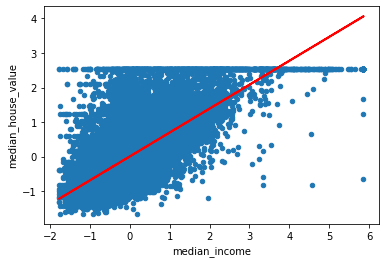

In [31]:
#plot least square line
sc_df.plot(kind='scatter',x='median_income',y='median_house_value')
plt.plot(x_test_Income,y_predict,c='red',linewidth=2)

In [32]:
lm=smf.ols(formula='median_house_value ~ median_income',data=sc_df).fit()

In [33]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     median_house_value   R-squared:                       0.473
Model:                            OLS   Adj. R-squared:                  0.473
Method:                 Least Squares   F-statistic:                 1.856e+04
Date:                Wed, 03 Mar 2021   Prob (F-statistic):               0.00
Time:                        20:55:59   Log-Likelihood:                -22668.
No. Observations:               20640   AIC:                         4.534e+04
Df Residuals:                   20638   BIC:                         4.536e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      1.691e-16      0.005   3.35e-14      1.000      -0.010       0.010
median_income     0.6881      0.005    136.223      0.000       0.678       0.698
==============================================================================
Omnibus:                     4245.795   Durbin-Watson:                   0.655
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             9273.446
Skew:                           1.191   Prob(JB):                         0.00
Kurtosis:                       5.260   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [34]:
#The P value is 0.000 indicates strong evidence against the null hypothesis, so you reject the null hypothesis.
# so, there is a strong relationship between median_house_value and median_income''""

In [35]:
# Perform Linear Regression to predict housing values based on housing_median_age
x_train_age = x_train[['housing_median_age']]
x_test_age = x_test[['housing_median_age']]

In [36]:
linreg=LinearRegression()
linreg.fit(x_train_age,y_train)
y_predict = linreg.predict(x_test_age)

In [37]:
#print intercept and coefficient of the linear equation
print(linreg.intercept_, linreg.coef_)
print(sqrt(mean_squared_error(y_test,y_predict)))
print((r2_score(y_test,y_predict)))

[0.00791436] [[0.10593621]]
0.9877609256462672
0.009556345002856625


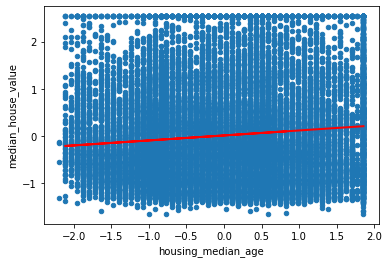

In [38]:
#plot least square line
sc_df.plot(kind='scatter',x='housing_median_age',y='median_house_value')
plt.plot(x_test_age,y_predict,c='red',linewidth=2)

In [39]:
lmm =smf.ols(formula='median_house_value ~ housing_median_age',data=sc_df).fit()

In [40]:
lmm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     median_house_value   R-squared:                       0.011
Model:                            OLS   Adj. R-squared:                  0.011
Method:                 Least Squares   F-statistic:                     232.8
Date:                Wed, 03 Mar 2021   Prob (F-statistic):           2.76e-52
Time:                        20:55:59   Log-Likelihood:                -29171.
No. Observations:               20640   AIC:                         5.835e+04
Df Residuals:                   20638   BIC:                         5.836e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept           1.691e-16      0.007   2.44e-14      1.000      -0.014       0.014
housing_median_age     0.1056      0.007     15.259      0.000       0.092       0.119
==============================================================================
Omnibus:                     2269.585   Durbin-Watson:                   0.325
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3093.615
Skew:                           0.938   Prob(JB):                         0.00
Kurtosis:                       3.281   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [41]:
#The P value is 0.000 indicates strong evidence against the null hypothesis, so you reject the null hypothesis.
# so, there is a strong relationship between median_house_value and housing_median_age''""